# TalentSprint

## Objective

At the end of the experiment, you will be able to

* understand word2vec
* apply word2vec on any dataset to extract meaningful insights from the dataset

## Dataset

The dataset choosen for this experiment is McDonalds review dataset. The dataset contains 1525 samples and two columns.

**Importing Necessary Libraries**

In [51]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/chandrakumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
data = pd.read_csv("McDonalds-Yelp-Sentiment-DFE.csv", encoding='latin')

In [53]:
data.shape

(1525, 10)

In [54]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'policies_violated',
       'policies_violated:confidence', 'city', 'policies_violated_gold',
       'review'],
      dtype='object')

**Removing unwanted columns**

In [55]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."


In [56]:
reviews = data["review"]

**Pre-processing**

In [57]:
#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

In [58]:
PUNCTUATIONS = '\'"?!,.;:'

#start process_review
def processReview(review):
    # process the reviews

    #Convert to lower case
    review = review.lower()
    #Convert www.* or https?://* to URL
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',review)
    #Remove additional white spaces
    review = re.sub('[\s]+', ' ', review)
    #Replace #word with word
    review = re.sub(r'#([^\s]+)', r'\1', review)
    #trim
    review = review.strip('\'"')
    review = review.strip('.,')
    
    review = review.strip(PUNCTUATIONS)
    review = replaceTwoOrMore(review)
    return review

In [59]:
processedReviews = []
for review in reviews:
  processedReviews.append(processReview(review).split())
processedReviews

[["i'm",
  'not',
  'a',
  'huge',
  'mcds',
  'lover,',
  'but',
  "i've",
  'been',
  'to',
  'better',
  'ones.',
  'this',
  'is',
  'by',
  'far',
  'the',
  'worst',
  'one',
  "i've",
  'ever',
  'been',
  'too!',
  "it's",
  'filthy',
  'inside',
  'and',
  'if',
  'you',
  'get',
  'drive',
  'through',
  'they',
  'completely',
  'screw',
  'up',
  'your',
  'order',
  'every',
  'time!',
  'the',
  'staff',
  'is',
  'terribly',
  'unfriendly',
  'and',
  'nobody',
  'seems',
  'to',
  'care'],
 ['terrible',
  'customer',
  'service.',
  'î¾i',
  'came',
  'in',
  'at',
  '9:30pm',
  'and',
  'stood',
  'in',
  'front',
  'of',
  'the',
  'register',
  'and',
  'no',
  'one',
  'bothered',
  'to',
  'say',
  'anything',
  'or',
  'help',
  'me',
  'for',
  '5',
  'minutes.',
  'î¾there',
  'was',
  'no',
  'one',
  'else',
  'waiting',
  'for',
  'their',
  'food',
  'inside',
  'either,',
  'just',
  'outside',
  'at',
  'the',
  'window.',
  'î¾',
  'i',
  'left',
  'and',

**Word2vec**

In [61]:
model = Word2Vec(sentences = processedReviews, size = 100, sg = 1, window = 3, min_count = 1, iter = 10)

In [62]:
list(model.wv.vocab)

["i'm",
 'not',
 'a',
 'huge',
 'mcds',
 'lover,',
 'but',
 "i've",
 'been',
 'to',
 'better',
 'ones.',
 'this',
 'is',
 'by',
 'far',
 'the',
 'worst',
 'one',
 'ever',
 'too!',
 "it's",
 'filthy',
 'inside',
 'and',
 'if',
 'you',
 'get',
 'drive',
 'through',
 'they',
 'completely',
 'screw',
 'up',
 'your',
 'order',
 'every',
 'time!',
 'staff',
 'terribly',
 'unfriendly',
 'nobody',
 'seems',
 'care',
 'terrible',
 'customer',
 'service.',
 'î¾i',
 'came',
 'in',
 'at',
 '9:30pm',
 'stood',
 'front',
 'of',
 'register',
 'no',
 'bothered',
 'say',
 'anything',
 'or',
 'help',
 'me',
 'for',
 '5',
 'minutes.',
 'î¾there',
 'was',
 'else',
 'waiting',
 'their',
 'food',
 'either,',
 'just',
 'outside',
 'window.',
 'î¾',
 'i',
 'left',
 'went',
 'chickfila',
 'next',
 'door',
 'greeted',
 'before',
 'all',
 'way',
 'inside.',
 'mcdonalds',
 'also',
 'dirty,',
 'floor',
 'covered',
 'with',
 'dropped',
 'food.',
 'obviously',
 'filled',
 'surly',
 'unhappy',
 'workers',
 'first',
 

In [63]:
model.most_similar('order')

/home/chandrakumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('order.', 0.848684549331665),
 ('order,', 0.8385844826698303),
 ('orders', 0.831405520439148),
 ('messed', 0.8005192875862122),
 ('bag', 0.8000306487083435),
 ('right.', 0.7916713953018188),
 ('orders,', 0.7876983880996704),
 ('forever', 0.7859410047531128),
 ('orders.', 0.7847578525543213),
 ('correct', 0.7794541120529175)]

In [30]:
 def plot_values(values, labels, figsize = (8,6), c = []):
    x = []
    y = []
    for value in values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=figsize) 
    for i in range(len(labels)):
        plt.scatter(x[i],y[i], color=c[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/chandrakumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


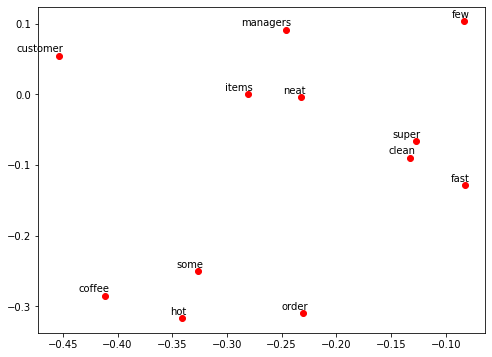

In [31]:
wv_list = ['super', 'order', 'customer', 'managers', 'some', 'coffee', 'hot', 'clean', 'fast', 'neat', 'few', 'items']
wv_new_labels = {}
for word in wv_list:
    wv_new_labels[word] = model[word]

colors = ['red' for i in range(len(wv_new_labels))]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)